<br><br>
<center><font size='5'><b>Deep Learning for All_pytorch</b></font><br><br><font size='5'>Chap4. MNIST Linear Model<b></b></font>

# MNIST 

## Import packages

In [ ]:
## import torch

import torchvision.datasets as dsets
import torchvision.transforms as transforms
# torchvision 패키지는 유명한 데이터셋,모델 아키텍쳐, 전처리 transform들 불러올 수 있음

import matplotlib.pyplot as plt
import random

- 일반 이미지는 (높이*너비*채널) 순서의 0~255 값인데,
- PyTorch 이미지는 (채널, 높이, 너비) 순서의 0~1 값이다.
  - transforms.ToTensor()가 파이토치에 잘 맞게 변환해준다.

## Data download

In [3]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

100.1%

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

## Data Loader & model

In [24]:
# 불러온 데이터를 사용하기 위해서 데이터 로더

from torch.utils.data import DataLoader## Import packages
data_loader = DataLoader(dataset=mnist_train, 
                        batch_size = 100, 
                        shuffle=True, 
                        drop_last=True) # drop_last는 배치사이즈 짜를때 뒤에 남는거 짜른다.

In [25]:
# 모델

linear = torch.nn.Linear(784, 10, bias=True).to(device)
#cost function

criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

## Train

In [26]:
training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)## Import packages
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535794735
Epoch: 0002 cost = 0.358837306
Epoch: 0003 cost = 0.330994576
Epoch: 0004 cost = 0.316192389
Epoch: 0005 cost = 0.306904912
Epoch: 0006 cost = 0.300009042
Epoch: 0007 cost = 0.294815123
Epoch: 0008 cost = 0.290546328
Epoch: 0009 cost = 0.287069440
Epoch: 0010 cost = 0.284326375
Epoch: 0011 cost = 0.281793028
Epoch: 0012 cost = 0.279695243
Epoch: 0013 cost = 0.277617663
Epoch: 0014 cost = 0.275867522
Epoch: 0015 cost = 0.274387449
Learning finished


## Test

Accuracy: 0.8817999958992004
Label:  5
Prediction:  8


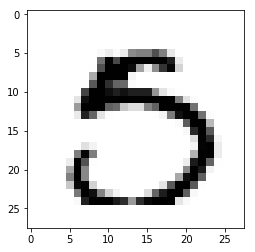

In [35]:
# Test the model using test sets
# with torch.no_grad() : 이 범위 안에서는, gradient를 계산 안하겠다.(습관 들이기)

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()